In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from scipy.stats import pearsonr
import sklearn



# Hypothesis -1
## Foods rich in fatty acids, antioxidants, B-vitamins, and amino acids can improve cognitive performance, particularly when these nutrients are combined in specific ratios.

Epoch 1/200


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


91/91 ━━━━━━━━━━━━━━━━━━━━ 0s 796us/step - accuracy: 0.1143 - loss: 5.9562 - val_accuracy: 0.4121 - val_loss: 5.0166
Epoch 2/200
91/91 ━━━━━━━━━━━━━━━━━━━━ 0s 391us/step - accuracy: 0.4640 - loss: 5.6776 - val_accuracy: 0.7115 - val_loss: 4.5715
Epoch 3/200
91/91 ━━━━━━━━━━━━━━━━━━━━ 0s 391us/step - accuracy: 0.6705 - loss: 4.9220 - val_accuracy: 0.6456 - val_loss: 4.3355
Epoch 4/200
91/91 ━━━━━━━━━━━━━━━━━━━━ 0s 403us/step - accuracy: 0.6567 - loss: 5.2210 - val_accuracy: 0.6456 - val_loss: 3.9912
Epoch 5/200
91/91 ━━━━━━━━━━━━━━━━━━━━ 0s 381us/step - accuracy: 0.6242 - loss: 4.2943 - val_accuracy: 0.6456 - val_loss: 3.4779
Epoch 6/200
91/91 ━━━━━━━━━━━━━━━━━━━━ 0s 406us/step - accuracy: 0.6456 - loss: 3.7998 - val_accuracy: 0.6841 - val_loss: 2.9729
Epoch 7/200
91/91 ━━━━━━━━━━━━━━━━━━━━ 0s 383us/step - accuracy: 0.6653 - loss: 3.2747 - val_accuracy: 0.7500 - val_loss: 2.5482
Epoch 8/200
91/91 ━━━━━━━━━━━━━━━━━━━━ 0s 380us/step - accuracy: 0.6759 - loss: 3.0601 - val_accuracy: 0.7143

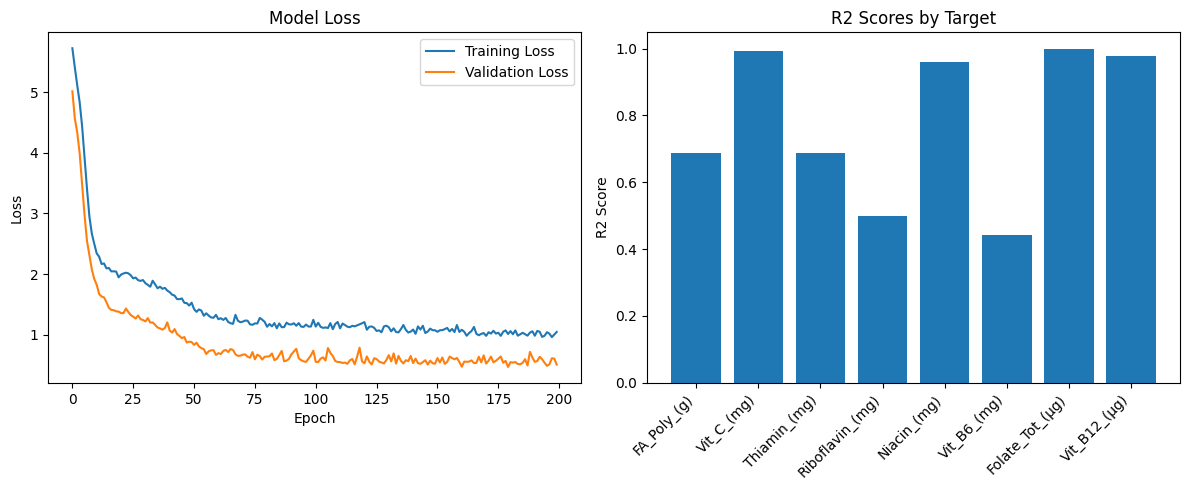

15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 255us/step


<Figure size 800x600 with 0 Axes>

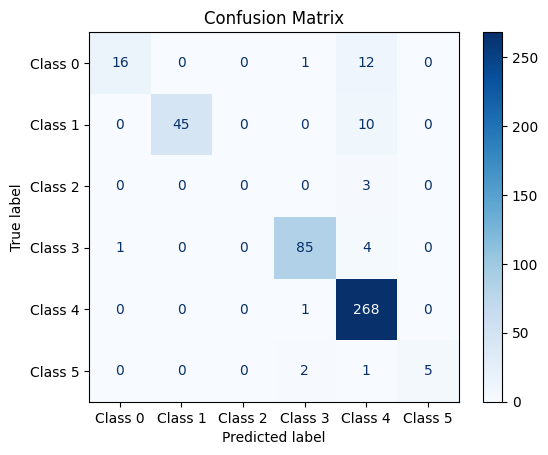

In [6]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import mean_absolute_error, r2_score
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv('food-data.csv')
df = df.dropna()

# Select relevant features
features = ['Protein_(g)', 'Lipid_Tot_(g)', 'Carbohydrt_(g)', 'Fiber_TD_(g)', 'Sugar_Tot_(g)',
            'Calcium_(mg)', 'Iron_(mg)', 'Magnesium_(mg)', 'Phosphorus_(mg)', 'Potassium_(mg)',
            'Sodium_(mg)', 'Zinc_(mg)', 'Copper_mg)', 'Manganese_(mg)', 'Selenium_(µg)',
            'Vit_C_(mg)', 'Thiamin_(mg)', 'Riboflavin_(mg)', 'Niacin_(mg)', 'Panto_Acid_mg)',
            'Vit_B6_(mg)', 'Folate_Tot_(µg)', 'Choline_Tot_ (mg)', 'Vit_B12_(µg)',
            'Vit_A_IU', 'Vit_E_(mg)', 'Vit_D_µg', 'Vit_K_(µg)']

# Select target variables (nutrients hypothesized to enhance cognitive performance)
targets = ['FA_Poly_(g)', 'Vit_C_(mg)', 'Thiamin_(mg)', 'Riboflavin_(mg)', 'Niacin_(mg)',
           'Vit_B6_(mg)', 'Folate_Tot_(µg)', 'Vit_B12_(µg)']

# Prepare the data
X = df[features]
y = df[targets]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Create the neural network model
model = Sequential([
    Dense(128, activation='relu', input_shape=(len(features),)),
    Dropout(0.3),
    Dense(64, activation='relu'),
    Dropout(0.3),
    Dense(32, activation='relu'),
    Dense(len(targets))
])

# Compile with a smaller learning rate
model.compile(optimizer=Adam(learning_rate=0.0005), 
              loss='mean_absolute_error',  # Change loss for classification
              metrics=['accuracy'])  # Add accuracy metric

history = model.fit(X_train_scaled, y_train, epochs=200, batch_size=16, validation_split=0.2, verbose=1)

# Evaluate and predict
test_loss, test_accuracy = model.evaluate(X_test_scaled, y_test)
print(f"Test Loss: {test_loss}")
print(f"Test Accuracy: {test_accuracy:.4f}")


predictions = model.predict(X_test_scaled)
predicted_classes = np.argmax(predictions, axis=1)  # Get predicted classes

# Calculate accuracy score
true_classes = np.argmax(y_test.values, axis=1)  # Assuming y_test is one-hot encoded
accuracy = accuracy_score(true_classes, predicted_classes)
print(f"Accuracy Score: {accuracy:.4f}")

#evaluation, prediction
test_loss_value = model.evaluate(X_test_scaled, y_test)
print(f"Test Loss: {test_loss_value}")


#MAE and R2 score for each target varible
mae_scores, r2_scores = [], []

for i, target in enumerate(targets):
    mae = mean_absolute_error(y_test.iloc[:, i], predictions[:, i])
    r2 = r2_score(y_test.iloc[:, i], predictions[:, i])
    mae_scores.append(mae)
    r2_scores.append(r2)
    print(f"{target}:")
    print(f"  MAE: {mae:.4f}")
    print(f"  R2 Score: {r2:.4f}")
    print()

avg_mae = np.mean(mae_scores)
avg_r2 = np.mean(r2_scores)

print(f"Average MAE: {avg_mae:.4f}")
print(f"Average R2 Score: {avg_r2:.4f}")
print(f"Accuracy Score: {accuracy:.4f}")

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()

plt.subplot(1, 2, 2)
plt.bar(targets, r2_scores)
plt.title('R2 Scores by Target')
plt.ylabel('R2 Score')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

predictions = model.predict(X_test_scaled)
#predicted classes
predicted_classes = np.argmax(predictions, axis=1) 

# Get true class labels
right_classes = np.argmax(y_test, axis=1) 

# Compute the confusion matrix
cm = confusion_matrix(right_classes, predicted_classes)

# Define your class names
classnames = ['Class 0', 'Class 1', 'Class 2', 'Class 3', 'Class 4', 'Class 5']


dplot = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=classnames)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
dplot.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.show()



# chosen CNN since we are dealing with multi dimentional data
we can see the loss is generally decreasing indicating model ois learning

i have used 200 epochs to let the model learn the data prop
from the model output we have avg mae value, avg r2 score =0.7 which is high indicating
and the accuracy score of 0.9229 indicating the model performed well

the Avg MAE value 0.6254 indicating the lower mae value indicating better performance in predicting specific nutrients

the Avg R2 value - 0.7804 indicates the the predictions closely match with the actual values


from the confusion matrix, we can say the class 4 has highest accuracy so model is  highly accurate for class 4  and class 1 is well separated and this indicates the mnodel performs well on certain cases like class4 and class 1

In [11]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.impute import SimpleImputer

dataset = pd.read_csv('food-data.csv')

relevant_nutrients = [
    'Protein_(g)', 'Lipid_Tot_(g)', 'Vit_C_(mg)', 'Thiamin_(mg)',
    'Riboflavin_(mg)', 'Niacin_(mg)', 'Vit_B6_(mg)', 'Folate_Tot_(µg)',
    'Choline_Tot_ (mg)', 'Vit_B12_(µg)', 'Vit_E_(mg)', 'FA_Poly_(g)'
]

X=dataset[relevant_nutrients]

dataset['Cognitive_Performance'] = (X.sum(axis=1) > X.sum(axis=1).median()).astype(int)
y=dataset['Cognitive_Performance']

# Impute missing values using the mean
imputer = SimpleImputer(strategy='mean')
X_imputed = imputer.fit_transform(X)

#train andtest
X_train, X_test, y_train, y_test = train_test_split(X_imputed, y, test_size=0.2, random_state=42)

# random forest
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Predict on the test set
y_pred = rf_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)

confusion = confusion_matrix(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print("Confusion Matrix:")
print(confusion)
print("Classification Report:")
print(report)

Accuracy: 0.9747332959011791
Confusion Matrix:
[[909  14]
 [ 31 827]]
Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.98      0.98       923
           1       0.98      0.96      0.97       858

    accuracy                           0.97      1781
   macro avg       0.98      0.97      0.97      1781
weighted avg       0.97      0.97      0.97      1781



From the above output we can deduce the following 

The model gives an accuracy of 97.47%, indicating that it correctly classifies 97.47% of all instances in the dataset.

Class 0
Precision: 0.97
Recall: 0.98
F1-score: 0.98
Class 0 shows strong performance across all metrics. The high recall indicates that the model correctly identifies 98% of all the instances. The precision of 0.97 means that when the model predicts Class 0, it is correct 97% of the time.

Class 1
Precision: 0.98
Recall: 0.96
F1-score: 0.97
Class 1 also demonstrates excellent performance. The slightly higher precision compared to Class 0 suggests that when the model predicts Class 1, it is even more likely to be correct. However, the recall is slightly lower at 0.96, meaning it misses a small percentage of actual Class 1 instances.

from Confusion Matrix we can say
True Negatives : 909
False Positives: 14
False Negatives: 31
True Positives : 827


The model shows a low number of misclassifications in both directions. It has slightly more false negatives (31) than false positives (14), which aligns with the slightly lower recall for Class 1.

# Hypothesis -2
## Physical exercise frequency is linked to higher protein intake among age group , with BMR also influencing protein consumption

Cross Validated Root Mean Squared Error: 2.05
Test Root Mean Squared Error: 2.20
R-squared: 0.9909
Feature Importance:
                 Feature  Coefficient  Absolute_Importance
3                    BMR    17.048999            17.048999
0      Physical exercise    14.338120            14.338120
5                 Weight    -0.472504             0.472504
4                 Height     0.304294             0.304294
1                    Age     0.069588             0.069588
2  Daily meals frequency     0.041041             0.041041


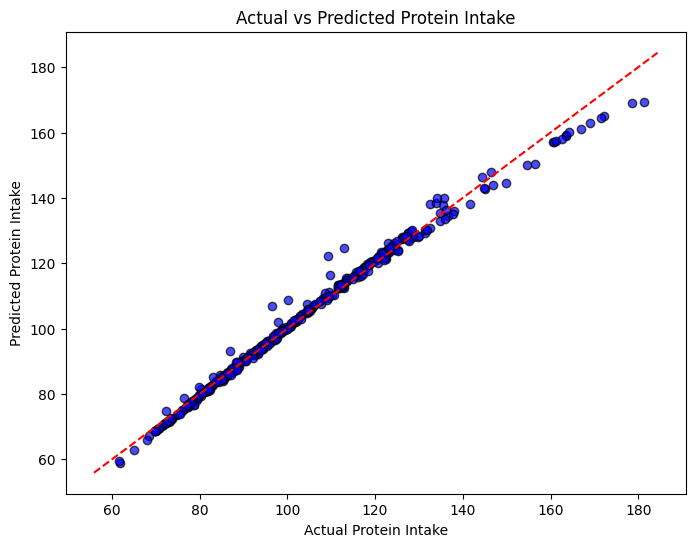

In [60]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import Ridge
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, r2_score

data=pd.read_csv('user_nutritional_data.csv')
data=data.dropna()

# filtering data(age groups 15-30)
sub_data=data[(data['Age']>=15)&(data['Age']<=30)]

# choosing relevant features for regression model
features= ['Physical exercise','Age','Daily meals frequency','BMR','Height','Weight']
target_var = 'Proteins'

# feature set and target variable
X=sub_data[features]
y=sub_data[target_var]
X_train, X_test, y_train, y_test= train_test_split(X, y, test_size=0.2, random_state=42)

pipeline = Pipeline([('scaler', StandardScaler()),('regressor', Ridge(alpha=1.0))])

#cross-validation
crossv_scores = cross_val_score(pipeline, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
mean_msqe = np.mean(-crossv_scores)
mean_rmsqe = np.sqrt(mean_msqe)

#fitting the model on training data
pipeline.fit(X_train, y_train)

# predicting on test data
y_pred = pipeline.predict(X_test)

msqe=mean_squared_error(y_test, y_pred)
rmsqe=np.sqrt(msqe)
r2=r2_score(y_test, y_pred)

print(f"Cross Validated Root Mean Squared Error: {mean_rmse:.2f}")
print(f"Test Root Mean Squared Error: {rmsqe:.2f}")
print(f"R-squared: {r2:.4f}")

# displays respective feature importance
coeff=pd.DataFrame({'Feature':features,'Coefficient':pipeline.named_steps['regressor'].coef_})
coeff['Absolute_Importance']=abs(coeff['Coefficient'])
coeff=coeff.sort_values('Absolute_Importance', ascending=False)
print("Feature Importance:")
print(coeff)

plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='blue', edgecolor='k', alpha=0.7)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--')
plt.title('Actual vs Predicted Protein Intake')
plt.ylabel('Predicted Protein Intake')
plt.xlabel('Actual Protein Intake')
plt.title('Actual vs Predicted Protein Intake')
plt.show()



#### Using Ridge regression gave us a positive corelation, the reason for choosing ridge is to predict the protien intake for different and since as the target var is continuous, it helps prevent overfitting by reducing the effect of less important parameters.

we got a R-square value of 0.9909 indictaing a strong fit and also 


cross-validated rmse gave - 2.05 and test rmse being very close to cross-validted rmse inditcaing a better predicting accuracy to the data and is not overfitting

we can also see BMR influencing the protein intake among the age group 15 - 30

with this prediction we can suggest diets with respective amounts of protien depending upon the age group and physical excercise level

One-way ANOVA results:
F-statistic: 377.1631
p-value: 5.7261e-247


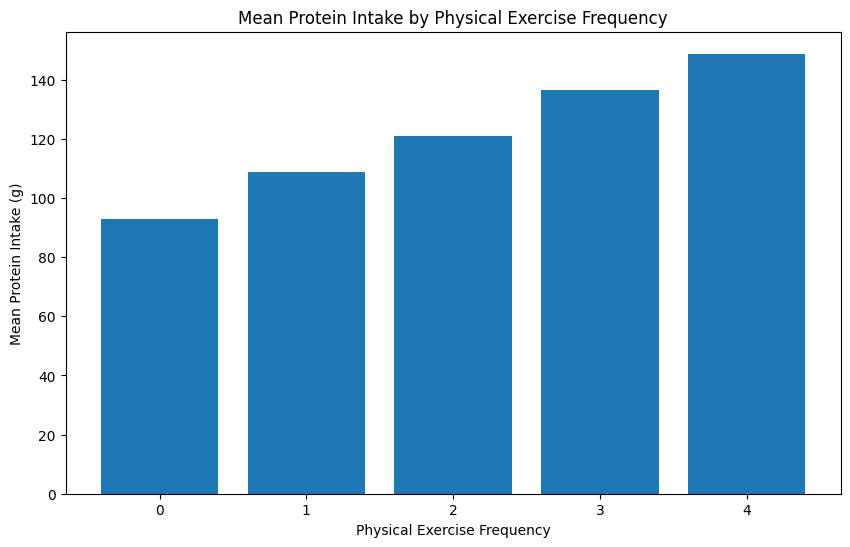


Tukey's HSD test results:
Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower   upper  reject
----------------------------------------------------
     0      1  15.6325    0.0 12.6404 18.6245   True
     0      2  27.8783    0.0 23.4254 32.3311   True
     0      3   43.418    0.0 36.7869 50.0491   True
     0      4  55.7651    0.0 50.7966 60.7337   True
     1      2  12.2458    0.0  7.1419 17.3498   True
     1      3  27.7855    0.0 20.7008 34.8703   True
     1      4  40.1327    0.0 34.5731 45.6923   True
     2      3  15.5397    0.0   7.725 23.3544   True
     2      4  27.8869    0.0 21.4228 34.3509   True
     3      4  12.3472 0.0003  4.2276 20.4668   True
----------------------------------------------------


In [57]:
from scipy import stats
import matplotlib.pyplot as plt
from statsmodels.stats.multicomp import pairwise_tukeyhsd

data = pd.read_csv('user_nutritional_data.csv')
data_groups = data.groupby('Physical exercise')['Proteins'].apply(list)

# performing Anova
f_statistic, p_value = stats.f_oneway(*data_groups)

print(f"One-way ANOVA results:")
print(f"F-statistic: {f_statistic:.4f}")
print(f"p-value: {p_value:.4e}")

# mean/avg protein intake for each exercise group
proteins_mean = data.groupby('Physical exercise')['Proteins'].mean()
plt.figure(figsize=(10, 6))
plt.bar(proteins_mean.index, proteins_mean.values)
plt.xlabel('Physical Exercise Frequency')
plt.ylabel('Mean Protein Intake (g)')
plt.title('Mean Protein Intake by Physical Exercise Frequency')
plt.show()

# Post-hoc analysis: Tukey's HSD test
from statsmodels.stats.multicomp import pairwise_tukeyhsd

# Prepare data for Tukey's test
exercise_freq = data['Physical exercise']
proteins = data['Proteins']

# Perform Tukey's test
tukey_results = pairwise_tukeyhsd(proteins, exercise_freq)
print("\nTukey's HSD test results:")
print(tukey_results)


### The hypothesis - physical exercise frequency is positively correlated with daily protein intake among age group 15-30 is positive for this analysis.

I have chosen ANOVA as we have to compare multiple groups (i.e excerise frequencies) for statistical difference and get to know which particular groups have difference in protien intake( for example - group 0 and rest of the groups can be considered)

From the ANOVA result, the resultant p-value came less than 0.05 (p-value: 5.7261e-247,  p<0.05) and F-statistic value being high enough along with low p value indicating there is a statistical difference in protein intake among  exercise frequency groups.

As we can see from Tukey's HSD test result, there is statistically significant differences in protein intake between the groups, showing exercise frequency has a significant effect on protein intake.
As exercise frequency increases -> "from Group 0 to Group 4", protein intake also increases, with little differences between Groups 3 and 4.